## Testowanie/Prezentacja działania wybranych napisanych funkcji 

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from imp import reload 

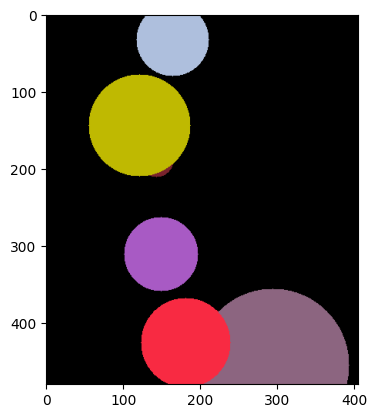

In [5]:
import individual
reload(individual)
from individual import Individual

def test_convert_to_pixels_array():    
    indiv = Individual()
    indiv.generate_random_inidividual()
    indiv.show_image()

test_convert_to_pixels_array()

rozmiar obrazka to:  480 405
odlegosc od prawdziwej perły to  68.273551107


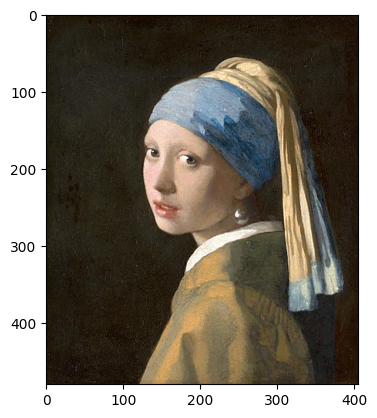

In [6]:
import utils
reload(utils)
from utils import Utils

def test_objective_function():
    monalisa_utils = Utils('pics/GirlwithaPearl.jpg')
    plt.imshow(monalisa_utils.objective_picture)
    print("rozmiar obrazka to: ", monalisa_utils.length, monalisa_utils.width)

    random_picture = Individual()
    random_picture.generate_random_inidividual()

    objective_value = monalisa_utils.objective_function(random_picture)
    print("odlegosc od prawdziwej perły to ", objective_value)

test_objective_function()

In [ ]:
import evolution
reload(evolution)
from evolution import Evolution

def test_evolution():
    mona_evolution = Evolution()
    initial_population = mona_evolution.evolve()
    return initial_population

P = test_evolution()
print("poczatkowa populacja sklada sie z: ", P.population_size)
print("jego pierwszy osobnik wyglada tak:")
P.population[0].show_image()
print("odleglosc do manalisy to: ", P.population[0].objective_value)


In [ ]:
reload(utils)
from utils import Utils

def test_crossover():
    monalisa_utils = Utils('GirlwithaPearl.jpg')
    print('pstwo mutacji to: ', monalisa_utils.mutation_probability)

    random_parents = monalisa_utils.create_initial_population(2)
    children = monalisa_utils.create_children_population(random_parents, np.array([0,1]))
    
    p1, p2 = random_parents.population[0], random_parents.population[1]
    child1, child2 = children.population[0], children.population[1] 
    return p1, p2, child1, child2 

x1, x2, c1, c2 = test_crossover()

In [ ]:
print('parent1: ')
x1.show_image()

In [ ]:
print('parent2: ')
x2.show_image()

In [ ]:
print('child1: ')
c1.show_image()

In [ ]:
print('child2: ')
c2.show_image()

startuje ewolucje !
genracja nr:  0 , bestobj value:  68.8904161333
genracja nr:  1 , bestobj value:  65.2025622749
genracja nr:  2 , bestobj value:  62.7115876806
genracja nr:  3 , bestobj value:  60.3264897488
genracja nr:  4 , bestobj value:  58.5871818796
genracja nr:  5 , bestobj value:  58.0654615216
genracja nr:  6 , bestobj value:  55.3601785025
genracja nr:  7 , bestobj value:  54.9710311672
genracja nr:  8 , bestobj value:  53.4411750042
genracja nr:  9 , bestobj value:  53.4411750042
genracja nr:  10 , bestobj value:  52.3001129927
genracja nr:  11 , bestobj value:  52.3001129927
genracja nr:  12 , bestobj value:  52.0657488986
genracja nr:  13 , bestobj value:  51.1485689535
genracja nr:  14 , bestobj value:  50.5052588973
genracja nr:  15 , bestobj value:  49.8304175091
genracja nr:  16 , bestobj value:  49.5066121848
genracja nr:  17 , bestobj value:  49.4443432414
genracja nr:  18 , bestobj value:  48.7994504611
genracja nr:  19 , bestobj value:  48.7994504611
genracja n

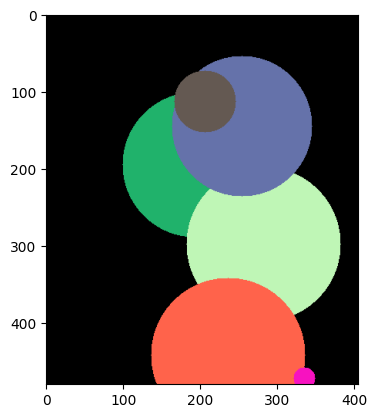

In [8]:
import evolution
reload(evolution)
from evolution import Evolution

def test_evolution():
    pearl_evolution = Evolution()
    best_picture, statistics = pearl_evolution.evolve()

    best_picture.show_image()

test_evolution()

### Nowy rodzaj mutacji - delikatnie coś pozmieniaj 

In [ ]:
import individual
reload(individual)
from individual import Individual

import splash
reload(splash)
from splash import Splash

x = Individual()
plameczka = Splash()
plameczka.random_splash(Splash.MAX_RANK, Splash.LENGTH, Splash.WIDTH)

x.splash_parameters = [plameczka]
x.pixels_array = x.convert_to_pixels_array()

x.show_image()

In [ ]:
import splash
reload(splash)
from splash import Splash


plameczka.change_slightly(Splash.RADIUS)
x.pixels_array = x.convert_to_pixels_array()

x.show_image()

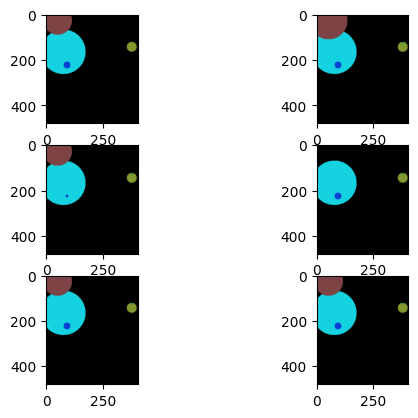

In [43]:
import copy 

import individual
reload(individual)
from individual import Individual
import population
from population import Population
import splash
reload(splash)
from splash import Splash

import utils
reload(utils)
from utils import Utils

x = Individual()
x.generate_random_inidividual()

f, axarr = plt.subplots(3,2)
axarr[2, 0].imshow(x.convert_to_pixels_array())

pearl_utils = Utils('pics/GirlwithaPearl.jpg')

children = Population()
for _ in range(4):
    new_child = copy.deepcopy(x)
    pearl_utils.mutate_slightly(new_child)
    children.append(new_child)
    
axarr[0, 0].imshow(children.population[0].convert_to_pixels_array())
axarr[0, 1].imshow(children.population[1].convert_to_pixels_array())
axarr[1, 0].imshow(children.population[2].convert_to_pixels_array())
axarr[1, 1].imshow(children.population[3].convert_to_pixels_array())
axarr[2, 1].imshow(x.convert_to_pixels_array())